## Import relevant libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
%matplotlib inline
from datetime import timedelta
from datetime import datetime
from dateutil.relativedelta import relativedelta

### Load the Dataset

In [2]:
df = pd.read_csv('B:/My Works/Data Science/Jenga Kenya/dummy_data.csv', parse_dates = True)
df.head()

,ClientID,Group ID,Client Type,Active,Date Of Birth,Gender,Marital Status,County,NOK Relationship,Main Economic Activity,...,Occupation,Loan ID,Loan_Type,Initial_Loan_Date,Loan_Amount,Interest_Rate,Loan_Length,Number_Payments,Time_Between_Payments,Loan_status
0,5841,100329,Group Client,1.0,1988-01-01,2.0,MARRIED,MERU,HUSBAND,FARMER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5840,100329,Group Client,1.0,1990-07-09,2.0,MARRIED,MERU,HUSBAND,FARMER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5839,100329,Group Client,1.0,1952-01-01,1.0,MARRIED,MERU,WIFE,FARMER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5838,100318,Group Client,1.0,1972-01-01,1.0,MARRIED,MERU,WIFE,FARMER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5837,100271,Group Client,1.0,1970-01-01,2.0,MARRIED,MERU,HUSBAND,FARMER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe()

,ClientID,Group ID,Active,Gender,Loan ID,Loan_Type,Loan_Amount,Interest_Rate,Loan_Length,Number_Payments,Time_Between_Payments,Loan_status
count,3790.000000,3790.000000,3789.000000,3747.000000,2829.000000,2817.000000,2825.000000,2829.000000,2829.000000,2829.000000,2829.000000,2829.000000
mean,3769.907652,100189.656464,0.892584,1.767280,8794.144574,7.557685,19442.289558,0.179286,10.420997,39.520325,1.103217,0.394486
std,1288.673407,86.898385,0.309683,0.422621,3882.000941,3.294542,31168.287349,0.042637,3.223279,16.149891,0.304295,0.488826
min,22.000000,100001.000000,0.000000,1.000000,396.000000,0.000000,0.000000,0.050000,1.000000,4.000000,1.000000,0.000000
25%,2801.250000,100135.250000,1.000000,2.000000,5330.000000,5.000000,2500.000000,0.200000,12.000000,24.000000,1.000000,0.000000
50%,3858.500000,100195.000000,1.000000,2.000000,8966.000000,9.000000,10000.000000,0.200000,12.000000,50.000000,1.000000,0.000000
75%,4849.750000,100266.000000,1.000000,2.000000,12550.000000,9.000000,25000.000000,0.200000,12.000000,50.000000,1.000000,1.000000
max,5841.000000,100330.000000,1.000000,2.000000,14478.000000,12.000000,731500.000000,0.400000,24.000000,100.000000,2.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3790 entries, 0 to 3789
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ClientID                     3790 non-null   int64  
 1   Group ID                     3790 non-null   int64  
 2   Client Type                  3779 non-null   object 
 3   Active                       3789 non-null   float64
 4   Date Of Birth                3790 non-null   object 
 5   Gender                       3747 non-null   float64
 6   Marital Status               3569 non-null   object 
 7   County                       1741 non-null   object 
 8   NOK Relationship             3093 non-null   object 
 9   Main Economic Activity       2770 non-null   object 
 10  Client Location              2719 non-null   object 
 11  Secondary Economic Activity  1595 non-null   object 
 12  Occupation                   1058 non-null   object 
 13  Loan ID           

### Preprocessing

In [5]:
#find the null values
df.isnull().sum()

ClientID                          0
Group ID                          0
Client Type                      11
Active                            1
Date Of Birth                     0
Gender                           43
Marital Status                  221
County                         2049
NOK Relationship                697
Main Economic Activity         1020
Client Location                1071
Secondary Economic Activity    2195
Occupation                     2732
Loan ID                         961
Loan_Type                       973
Initial_Loan_Date               976
Loan_Amount                     965
Interest_Rate                   961
Loan_Length                     961
Number_Payments                 961
Time_Between_Payments           961
Loan_status                     961
dtype: int64

In [6]:
# fill the missing vallues for numerical terms - mean
df['Loan_Amount'] = df['Loan_Amount'].fillna(df['Loan_Amount'].mean())
df['Loan_Length'] = df['Loan_Length'].fillna(df['Loan_Length'].mode()[0])


In [7]:
df['Active'].mode()[0]

1.0

In [8]:
# fill the missing values for categorical and ordinal terms - mode
df['Group ID'] = df['Group ID'].fillna(df['Group ID'].mode()[0])
df['Client Type'] = df['Client Type'].fillna(df['Client Type'].mode()[0])
df['Active'] = df['Active'].fillna(df['Active'].mode()[0])
df['Date Of Birth'] = df['Date Of Birth'].fillna(df['Date Of Birth'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Marital Status'] = df['Marital Status'].fillna(df['Marital Status'].mode()[0])
df['County'] = df['County'].fillna(df['County'].mode()[0])
df['NOK Relationship'] = df['NOK Relationship'].fillna(df['NOK Relationship'].mode()[0])
df['Main Economic Activity'] = df['Main Economic Activity'].fillna(df['Main Economic Activity'].mode()[0])
df['Client Location'] = df['Client Location'].fillna(df['Client Location'].mode()[0])
df['Secondary Economic Activity'] = df['Secondary Economic Activity'].fillna(df['Secondary Economic Activity'].mode()[0])
df['Occupation'] = df['Occupation'].fillna(df['Occupation'].mode()[0])
df['Loan ID'] = df['Loan ID'].fillna(df['Loan ID'].mode()[0])
df['Loan_status'] = df['Loan_status'].fillna(df['Loan_status'].mode()[0])
df['Loan_Type'] = df['Loan_Type'].fillna(df['Loan_Type'].mode()[0])
df['Initial_Loan_Date'] = df['Initial_Loan_Date'].fillna(df['Initial_Loan_Date'].mode()[0])
df['Interest_Rate'] = df['Interest_Rate'].fillna(df['Interest_Rate'].mode()[0])
df['Number_Payments'] = df['Number_Payments'].fillna(df['Number_Payments'].mode()[0])
df['Time_Between_Payments'] = df['Time_Between_Payments'].fillna(df['Time_Between_Payments'].mode()[0])

In [9]:
df.isnull().sum()

ClientID                       0
Group ID                       0
Client Type                    0
Active                         0
Date Of Birth                  0
Gender                         0
Marital Status                 0
County                         0
NOK Relationship               0
Main Economic Activity         0
Client Location                0
Secondary Economic Activity    0
Occupation                     0
Loan ID                        0
Loan_Type                      0
Initial_Loan_Date              0
Loan_Amount                    0
Interest_Rate                  0
Loan_Length                    0
Number_Payments                0
Time_Between_Payments          0
Loan_status                    0
dtype: int64

### Exploratory Data Analysis


### Create additional attributes
 - Age
 - DOB day
 - DOB month
 - DOB year
 - Disbursal day (Initial Loan date)
 - Client duration
 - Number of subsequent Loans

In [10]:
df['Initial_Loan_Date'] = pd.to_datetime(df['Initial_Loan_Date'])
print(df['Initial_Loan_Date'] .dtypes)

datetime64[ns]


In [11]:
df['Date Of Birth'] = pd.to_datetime(df['Date Of Birth'])
print (df['Date Of Birth'].dtypes)

datetime64[ns]


In [12]:
#getting the age of the clients
df['time_diff'] = (df['Initial_Loan_Date'] - df['Date Of Birth'])/365
df['age'] = df['time_diff'].dt.days


In [13]:
df.columns

Index(['ClientID', 'Group ID', 'Client Type', 'Active', 'Date Of Birth',
       'Gender', 'Marital Status', 'County', 'NOK Relationship',
       'Main Economic Activity', 'Client Location',
       'Secondary Economic Activity', 'Occupation', 'Loan ID', 'Loan_Type',
       'Initial_Loan_Date', 'Loan_Amount', 'Interest_Rate', 'Loan_Length',
       'Number_Payments', 'Time_Between_Payments', 'Loan_status', 'time_diff',
       'age'],
      dtype='object')

In [14]:
df.drop(['Initial_Loan_Date','Date Of Birth','time_diff'], axis=1, inplace=True)

In [15]:
df.head()

,ClientID,Group ID,Client Type,Active,Gender,Marital Status,County,NOK Relationship,Main Economic Activity,Client Location,...,Occupation,Loan ID,Loan_Type,Loan_Amount,Interest_Rate,Loan_Length,Number_Payments,Time_Between_Payments,Loan_status,age
0,5841,100329,Group Client,1.0,2.0,MARRIED,MERU,HUSBAND,FARMER,RUIRI,...,FARMER,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,0.0,31
1,5840,100329,Group Client,1.0,2.0,MARRIED,MERU,HUSBAND,FARMER,RUIRI,...,FARMER,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,0.0,29
2,5839,100329,Group Client,1.0,1.0,MARRIED,MERU,WIFE,FARMER,RUIRI,...,FARMER,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,0.0,67
3,5838,100318,Group Client,1.0,1.0,MARRIED,MERU,WIFE,FARMER,THIMBIRI,...,FARMER,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,0.0,47
4,5837,100271,Group Client,1.0,2.0,MARRIED,MERU,HUSBAND,FARMER,AKITHI,...,FARMER,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,0.0,49


## Label Encoding

In [16]:
pd.unique(df['Loan_status'])

array([0., 1.])

In [17]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender','Loan_status','Client Type','Marital Status','County','NOK Relationship','Main Economic Activity','Client Location','Secondary Economic Activity','Occupation']
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [18]:
df.head()

,ClientID,Group ID,Client Type,Active,Gender,Marital Status,County,NOK Relationship,Main Economic Activity,Client Location,...,Occupation,Loan ID,Loan_Type,Loan_Amount,Interest_Rate,Loan_Length,Number_Payments,Time_Between_Payments,Loan_status,age
0,5841,100329,2,1.0,1,2,0,7,159,357,...,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,0,31
1,5840,100329,2,1.0,1,2,0,7,159,357,...,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,0,29
2,5839,100329,2,1.0,0,2,0,12,159,357,...,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,0,67
3,5838,100318,2,1.0,0,2,0,12,159,377,...,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,0,47
4,5837,100271,2,1.0,1,2,0,7,159,7,...,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,0,49


In [19]:
df.columns

Index(['ClientID', 'Group ID', 'Client Type', 'Active', 'Gender',
       'Marital Status', 'County', 'NOK Relationship',
       'Main Economic Activity', 'Client Location',
       'Secondary Economic Activity', 'Occupation', 'Loan ID', 'Loan_Type',
       'Loan_Amount', 'Interest_Rate', 'Loan_Length', 'Number_Payments',
       'Time_Between_Payments', 'Loan_status', 'age'],
      dtype='object')

#### Re_ordering the columns

In [20]:
#move the targets to the end of the dataset
re_ordered_cols = ['ClientID', 'Group ID', 'Client Type', 'Active', 'Gender',
       'Marital Status','County', 'NOK Relationship',
       'Main Economic Activity', 'Client Location',
       'Secondary Economic Activity', 'Occupation', 'Loan ID', 'Loan_Type',
       'Loan_Amount', 'Interest_Rate', 'Loan_Length', 'Number_Payments',
       'Time_Between_Payments','age','Loan_status',]

In [21]:
df = df[re_ordered_cols]

In [22]:
df

,ClientID,Group ID,Client Type,Active,Gender,Marital Status,County,NOK Relationship,Main Economic Activity,Client Location,...,Occupation,Loan ID,Loan_Type,Loan_Amount,Interest_Rate,Loan_Length,Number_Payments,Time_Between_Payments,age,Loan_status
0,5841,100329,2,1.0,1,2,0,7,159,357,...,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,31,0
1,5840,100329,2,1.0,1,2,0,7,159,357,...,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,29,0
2,5839,100329,2,1.0,0,2,0,12,159,357,...,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,67,0
3,5838,100318,2,1.0,0,2,0,12,159,377,...,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,47,0
4,5837,100271,2,1.0,1,2,0,7,159,7,...,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,49,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,156,100010,2,1.0,1,2,0,7,169,144,...,119,14168.0,9.0,10000.000000,0.1,6.0,6.0,2.0,57,0
3786,144,100009,2,1.0,0,2,0,7,169,113,...,50,13843.0,9.0,40000.000000,0.2,12.0,50.0,1.0,50,0
3787,132,100017,2,1.0,0,2,1,7,26,284,...,50,12163.0,9.0,15000.000000,0.2,12.0,12.0,2.0,81,0
3788,59,100001,2,1.0,1,2,0,7,169,116,...,50,9542.0,9.0,50000.000000,0.2,12.0,50.0,1.0,59,1


# Train-Test Split

In [23]:
targets = df[df.columns[-1]]
unscaled = df[df.columns[1:-1]]

In [24]:
unscaled

,Group ID,Client Type,Active,Gender,Marital Status,County,NOK Relationship,Main Economic Activity,Client Location,Secondary Economic Activity,Occupation,Loan ID,Loan_Type,Loan_Amount,Interest_Rate,Loan_Length,Number_Payments,Time_Between_Payments,age
0,100329,2,1.0,1,2,0,7,159,357,68,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,31
1,100329,2,1.0,1,2,0,7,159,357,68,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,29
2,100329,2,1.0,0,2,0,12,159,357,68,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,67
3,100318,2,1.0,0,2,0,12,159,377,68,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,47
4,100271,2,1.0,1,2,0,7,159,7,68,50,396.0,9.0,19442.289558,0.2,12.0,50.0,1.0,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3785,100010,2,1.0,1,2,0,7,169,144,68,119,14168.0,9.0,10000.000000,0.1,6.0,6.0,2.0,57
3786,100009,2,1.0,0,2,0,7,169,113,68,50,13843.0,9.0,40000.000000,0.2,12.0,50.0,1.0,50
3787,100017,2,1.0,0,2,1,7,26,284,68,50,12163.0,9.0,15000.000000,0.2,12.0,12.0,2.0,81
3788,100001,2,1.0,1,2,0,7,169,116,68,50,9542.0,9.0,50000.000000,0.2,12.0,50.0,1.0,59


In [25]:
targets

0       0
1       0
2       0
3       0
4       0
       ..
3785    0
3786    0
3787    0
3788    1
3789    1
Name: Loan_status, Length: 3790, dtype: int64

### Balance the dataset

### Standardize the inputs

### Shuffle the data

In [26]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(unscaled,targets, test_size=0.25, random_state=42)
print (x_train.describe)
print(unscaled.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

<bound method NDFrame.describe of       Group ID  Client Type  Active  Gender  Marital Status  County  \
2880    100160            2     1.0       1               2       0   
2031    100096            2     0.0       0               2       0   
964     100267            5     1.0       1               3       0   
978     100264            5     1.0       1               3       0   
2412    100201            2     1.0       1               2       0   
...        ...          ...     ...     ...             ...     ...   
1130    100122            2     1.0       1               2       0   
1294    100201            2     1.0       0               2       0   
860     100276            2     1.0       0               4       0   
3507    100099            3     1.0       0               2       0   
3174    100132            2     1.0       1               2       0   

      NOK Relationship  Main Economic Activity  Client Location  \
2880                 7                     169

In [27]:
## Data Analysis packages
import pandas as pd
import numpy as np

## Machine learning packages
import sklearn, category_encoders
from category_encoders.ordinal import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, classification_report

## Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##AWS python package
import boto3
import joblib
import warnings
warnings.filterwarnings("ignore")


#### Decision Tree Classifier

In [29]:
#Using Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=10) #Build
dt_clf.fit(x_train,y_train) #Train

dt_clf.score(x_test, y_test) #make prediction

y_pred = dt_clf.predict(x_test)
dt_clf.score(x_test, y_test)


0.819620253164557

#### Random Forest Classifier

In [30]:
from sklearn import ensemble
rf_clf = ensemble.RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)
rf_clf.score(x_test,y_test)

0.869198312236287

#### Gradient Boosting Classifier

In [31]:
gb_clf = ensemble.GradientBoostingClassifier()
gb_clf.fit(x_train, y_train)
gb_clf.score(x_test, y_test)

0.8554852320675106

#### Support Vector Machine

In [32]:
from sklearn.svm import SVC
sv_clf = SVC(probability=True)
sv_clf.fit(x_test, y_test)
sv_clf.score(x_test,y_test)

0.7225738396624473

### Prediction Probabilities

In [39]:
r_probs = [0 for _ in range(len(y_test))]
dt_probs = dt_clf.predict_proba(x_test)
rf_probs = rf_clf.predict_proba(x_test)
gb_probs = gb_clf.predict_proba(x_test)
sv_probs = sv_clf.predict_proba(x_test)

##### Probabilities for the positive outcome is kept

In [40]:
dt_probs = dt_probs[:, 1]
rf_probs = rf_probs[:, 1]
gb_probs = gb_probs[:, 1]
sv_probs = sv_probs[:, 1]

### Compute the AUROC Values

In [41]:
from sklearn.metrics import roc_curve, roc_auc_score
r_auc = roc_auc_score(y_test, r_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
sv_auc = roc_auc_score(y_test, sv_probs)

#### Display the AUROC Scores

In [42]:
print("Random Forest: AUROC = %.3f"%(r_auc))
print("Decision Tree: AUROC = %.3f"%(dt_auc))
print("Random Forest: AUROC = %.3f"%(rf_auc))
print("Gradient Boosting Prediction: AUROC = %.3f"%(gb_auc))
print("Support Vector Machine: AUROC = %.3f"%(sv_auc))

Random Forest: AUROC = 0.500
Decision Tree: AUROC = 0.784
Random Forest: AUROC = 0.935
Gradient Boosting Prediction: AUROC = 0.928
Support Vector Machine: AUROC = 0.762


<AxesSubplot:xlabel='importance', ylabel='feature'>

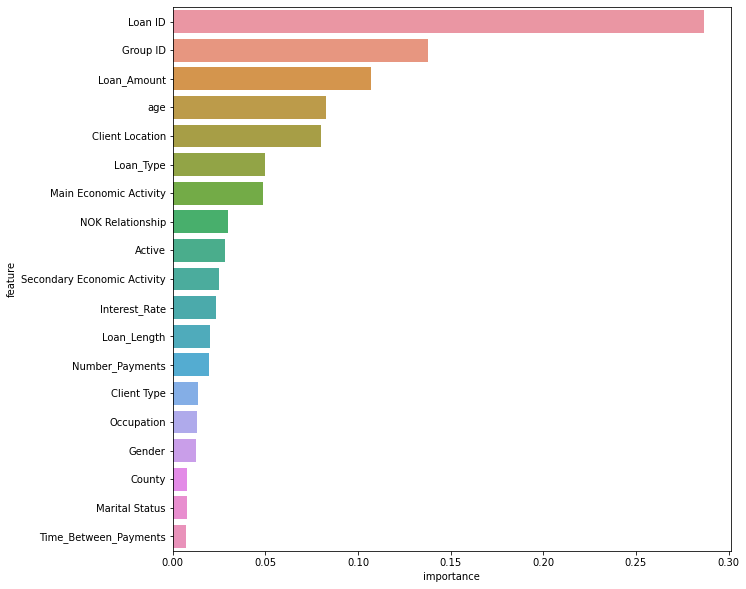

In [45]:
feature_importance_df = pd.DataFrame()
feature_importance_df['feature'] = x_train.columns
feature_importance_df['importance'] = rf_clf.feature_importances_

feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index()
plt.figure(figsize = (10, 10))
sns.barplot(x ='importance', y='feature', data = feature_importance_df[:20])
